<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/projeto_album_one_piece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO: Álbum One Piece 2021

Total de cromos: **212**.<br/>
Preço do livro ilustrado capa brochura: **R\$ 10,00**.<br/>
Envelope com 4 cromos: **R$ 4,00**.  

### SUPOSIÇÕES

Todas as figurinhas tem igual probabilidade de serem sorteradas.
Um pacotinho é comprado por vez até que se complete o álbum.

### ALGORITMO

Comprar um pacotinho de figurinhas (4 figurinhas cada, que podem ser repetidas);

Colar no álbum e verificar se o álbum está completo;

Caso esteja incompleto, comprar mais um pacotinho, caso contrário, terminar.

### PERGUNTAS

1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Qual a probabilidade de se gastar menos que R$1500,00 para completar o álbum?
5. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
6. Qual é um intervalo de confiança de 95% para o gasto ao se completar o álbum?
7. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?
8. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?
9. Quantas vezes saiu a figurinha mais repetida, em média ?
10. Em média, quantas figurinhas não se repetem ao completar o album ?
11. Faça um gráfico de porcentagem completa esperada em função do número de pacotes comprados.

### Exercícios

**Exercício 1**

Considere um balde cuja base possui raio $r_1$ e altura igual ao diâmetro da base. Considere também uma esfera de raio $r_2$ cheia de água. Faça um programa que verifique se o volume da esfera cabe no balde, dados os valores de $r_1$ e $r_2$.

**Exercício 2**

Crie uma função que simule o jogo do jokempô, isto é, dada a entrada de dois jogadores, retorne a indicação de qual deles venceu.

**Exercício 3**

Faça um programa que simule uma slot machine. Uma slot machine é uma máquina muito comum em cassinos. A pessoa puxa uma alavanca e aparecem na tela 3 símbolos aleatoriamente, de uma lista com diversos deles. Se os símbolos forem iguais, então a pessoa ganha. A pessoa entrar com um tanto escolhido de fichas, e joga até que acabe. Quando o programa terminar, uma mensagem resumindo os totais que ela ganhou deve ser exibida


### Algoritmo

In [2]:
import numpy as np

total_figurinhas = 7#212
preco_album = 10.0
preco_envelope = 4.0
fig_no_envelope = 4

def simula_album():
  album = np.zeros(total_figurinhas)
  album_incompleto = True
  faixa = np.arange(0, total_figurinhas)
  qtd_pacotes = 0

  while album_incompleto:
    pacote = np.random.choice(faixa, size = fig_no_envelope)
    qtd_pacotes += 1

    for figurinha in pacote:
      album[figurinha] += 1

    album_incompleto = not np.all(album)

  return qtd_pacotes * preco_envelope + preco_album, qtd_pacotes

### Perguntas

In [3]:
simulacoes, resultados, pacotes = 100, [], 0

for _ in range(simulacoes):
  custo, qtd_pacotes = simula_album()
  resultados.append(custo);
  pacotes += qtd_pacotes

resultados = np.array(resultados)
media = resultados.mean()
print(f'01. Valor médio investido: {media}')
print(f'02. Qtds. de pacotes: {pacotes / simulacoes}')


1. Valor médio investido: 29.32
2. Qtds. de pacotes: 4.83


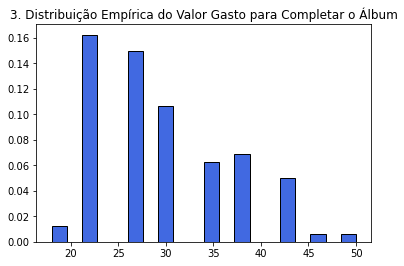

In [4]:
import matplotlib.pyplot as plt

plt.hist(resultados, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('03. Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

In [5]:
prob1 = sum(resultados < 1500) / simulacoes
prob2 = sum(resultados > media) / simulacoes

print(f'04. A probabilidade de se gastar menos de 1500 é: {prob1 * 100:.2f}%')
print(f'05. A probabilidade de se gastar mais do que a média é: {prob2 * 100:.2f}%')

4. A probabilidade de se gastar menos de 1500 é: 100.00%
5. A probabilidade de se gastar mais do que a média é: 48.00%


In [6]:
qts = np.quantile(resultados, [0.025, 0.975])
print(f'06. O intervalo de confiança de 95% para o gasto total é ({qts[0]:.2f}, {qts[1]:.2f})')

6. O intervalo de confiança de 95% para o gasto total é (22.00, 42.00)


In [35]:
def simula_album_2(qtd_albuns=1):
  album = np.zeros(total_figurinhas).astype(int)
  album_incompleto = True
  faixa = np.arange(0, total_figurinhas)
  qtd_pacotes = 0

  while album_incompleto:
    pacote = np.random.choice(faixa, size = fig_no_envelope)
    qtd_pacotes += 1

    for figurinha in pacote:
      album[figurinha] += 1

    album_incompleto = not np.all(album)

  gasto = qtd_pacotes * preco_envelope + preco_album * qtd_albuns

  # gasto por album
  return gasto / qtd_albuns, album


def simulacao_albuns(qtd, simulacoes = 1000):
    return [simula_album_2(qtd) for _ in range(simulacoes)]

total_album = np.array([])

for qtd in range(2, 4):
  simulacao = simulacao_albuns(qtd = qtd, simulacoes = 2)
  medias, albuns = zip(*simulacao)
  media = np.array(medias).mean()
  print(f'0{5 + qtd}. Custo médio entre {qtd} amigos: {round(media, 2)}')

  album_somado = np.array(sum(albuns))
  total_album = total_album + album_somado if total_album.size else album_somado

mais = total_album.max()
mais_repete = np.where(total_album == mais)[0]
print(f'09. A(s) figurinha(s) que mais se repete é {mais_repete} #{mais}')

menos = total_album.min()
menos_repete = np.where(total_album == menos)[0]
print(f'10. A(s) figurinha(s) que menos se repete é {menos_repete} #{menos}')


07. Custo médio entre 2 amigos: 19.0
08. Custo médio entre 3 amigos: 19.33
09. A(s) figurinha(s) que mais se repete é [4] #20
10. A(s) figurinha(s) que menos se repete é [3] #8


### Exercícios

In [94]:
import math

def esfera_cabe_no_balde(r1, r2, verboso=False):
  altura = 2 * r1
  volume_balde = math.pi * r1 ** 2 * altura
  volume_esfera =  math.pi * r2 ** 3 * 4 / 3

  if verboso:
    print(f'vol. balde: {volume_balde}, vol. esfera: {volume_esfera}, razão: {volume_balde / volume_esfera}')

  return volume_balde / volume_esfera >= 1

print('EX01')
'''
Exercício 1
Considere um balde cuja base possui raio $r_1$ e altura igual ao diâmetro da base. Considere também uma esfera de raio $r_2$ cheia de água. Faça um programa que verifique se o volume da esfera cabe no balde, dados os valores de $r_1$ e $r_2$.
'''

r1, r2 = 1, 1
print(f'R1: {r1}, R2: {r2}: {esfera_cabe_no_balde(r1, r2)}')

def valida(jogador1, jogada1, jogador2, jogada2):
  if jogador1.lower() == jogada1 and jogador2.lower() == jogada2:
    return jogador1

  if jogador1.lower() == jogada2 and jogador2.lower() == jogada1:
    return jogador2

  return None

print()
print('EX02')
'''
Exercício 2
Crie uma função que simule o jogo do jokempô, isto é, dada a entrada de dois jogadores, retorne a indicação de qual deles venceu.
'''

jogadas = ['pedra', 'tesoura', 'papel']
ganha_de = {'pedra': 'tesoura', 'tesoura': 'papel', 'papel': 'pedra'}
mensagens = {
  'pedra': 'A pedra amassou a tesoura !',
  'tesoura': 'A tesoura cortou o papel !',
  'papel': 'O papel embrulhou a pedra !',
}

def jokempo(jogador1, jogador2):
  jogadores = [jogador1.lower(), jogador2.lower()]
  jogada1, jogada2 = jogadores

  for jogada in jogadas:
    vencedor = valida(jogador1, jogada, jogador2, ganha_de[jogada]) 
    if vencedor:
      return vencedor == jogador1 and 'Jogador 1' or 'Jogador 2', mensagens[jogada]

  return None, None

for jogada1 in jogadas:
  for jogada2 in jogadas:
    jogador, mensagem = jokempo(jogada1, jogada2)
    mensagem_jogada = f'`{jogada1}` VS `{jogada2}`'
    if jogador:
      print(f'{mensagem_jogada}: O {jogador} venceu, {mensagem}')
    else:
      print(f'{mensagem_jogada}: Houve empate')

print()
print('EX03')
'''
Exercício 3
Faça um programa que simule uma slot machine. Uma slot machine é uma máquina muito comum em cassinos. 
A pessoa puxa uma alavanca e aparecem na tela 3 símbolos aleatoriamente, de uma lista com diversos deles. 
Se os símbolos forem iguais, então a pessoa ganha. A pessoa entrar com um tanto escolhido de fichas, e 
joga até que acabe. Quando o programa terminar, uma mensagem resumindo os totais que ela ganhou deve ser exibida
'''
import random, string

simbolos = list(string.ascii_lowercase)

def puxa_alavanca():
  rodada = random.choices(simbolos, k=3)
  return [1 for item in rodada if rodada[0] == item]

fichas = 100
ganhos = 0

for _ in range(fichas):
  resultado = puxa_alavanca()
  ganhos += len(resultado) == 3 and 1 or 0

print(f'De {fichas} ganhou {ganhos} vezes ({ganhos / fichas * 100}%)')


EX01
R1: 1, R2: 1: True

EX02
`pedra` VS `pedra`: Houve empate
`pedra` VS `tesoura`: O Jogador 1 venceu, A pedra amassou a tesoura !
`pedra` VS `papel`: O Jogador 2 venceu, O papel embrulhou a pedra !
`tesoura` VS `pedra`: O Jogador 2 venceu, A pedra amassou a tesoura !
`tesoura` VS `tesoura`: Houve empate
`tesoura` VS `papel`: O Jogador 1 venceu, A tesoura cortou o papel !
`papel` VS `pedra`: O Jogador 1 venceu, O papel embrulhou a pedra !
`papel` VS `tesoura`: O Jogador 2 venceu, A tesoura cortou o papel !
`papel` VS `papel`: Houve empate

EX03
De 100 ganhou 1 vezes (1.0%)
